## Confidence Interval

when the sample size is less than 30, we consider T-Test

In [3]:
import numpy as np
import scipy.stats as st

# Sample data
data = [12, 15, 14, 10, 13, 15, 16, 14, 11, 13]
n = len(data)
mean = np.mean(data)
std_err = st.sem(data)  # standard error = s/sqrt(n)

# 95% confidence interval using t-distribution because size of data is less than 30
ci = st.t.interval(0.95, df=n-1, loc=mean, scale=std_err)
# df: Degrees of freedom represent the number of observations that can freely change without violating a constraint in the data or model. 

ci = [i.round(2) for i in ci]
print("Sample Mean:", mean)
print("Population Mean with 95% Confidence Interval:", ci)


Sample Mean: 13.3
Population Mean with 95% Confidence Interval: [np.float64(11.95), np.float64(14.65)]


Sample size greater than 30, z test is considered

In [5]:
import numpy as np
import scipy.stats as st

# Example: Larger sample (n > 30)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=50)  # 50 samples

n = len(data)
# sample mean
mean = np.mean(data)
# standard error
std_err = st.sem(data) 

# Z critical value for 95% confidence (two-tailed)
z = st.norm.ppf(0.975)  # 95 percentile → 1.96
# This function is the percent-point function (inverse of the cumulative distribution function) for the standard normal distribution.

# Confidence Interval
ci_lower = mean - z * std_err
ci_upper = mean + z * std_err

print("Sample size:", n)
print("Mean:", mean)
print("Standard Error:", std_err)
print("95% Confidence Interval (Z-test):", (ci_lower, ci_upper))


Sample size: 50
Mean: 47.745260947438595
Standard Error: 1.3204070541034636
95% Confidence Interval (Z-test): (np.float64(45.157310676463176), np.float64(50.333211218414014))


    In above code, why did we consider ppf as 0.975 for 95 % confidence interval?
    To find the z-score for a 95% confidence interval, you need to consider that a 95% confidence interval means there is 2.5% in 
    each tail of the distribution (100% - 95% = 5%, divided by 2 for each tail). 
    Therefore, you need to find the z-score that corresponds to a cumulative probability of 0.975 (1 - 0.025).

    How would you calculate z score for 80% confidence interval?
    100 - 80 = 20
    2 tails : 20/2=10 => convert into decimal =>0.1
    1-0.1 => 0.9


In [6]:
import numpy as np
import scipy.stats as st

# Example: Larger sample (n > 30)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=50)  # 50 samples

n = len(data)
# sample mean
mean = np.mean(data)
# standard error
std_err = st.sem(data) 

# Z critical value for 80% confidence (two-tailed)
z = st.norm.ppf(0.9)  # 80% percentile 
# This function is the percent-point function (inverse of the cumulative distribution function) for the standard normal distribution.

# Confidence Interval
ci_lower = mean - z * std_err
ci_upper = mean + z * std_err

print("Sample size:", n)
print("Mean:", mean)
print("Standard Error:", std_err)
print("95% Confidence Interval (Z-test):", (ci_lower, ci_upper))

Sample size: 50
Mean: 47.745260947438595
Standard Error: 1.3204070541034636
95% Confidence Interval (Z-test): (np.float64(46.05309122009617), np.float64(49.43743067478102))


## Central Limit Theorem

Scenario: Number of bikes rented per day at a city bike-sharing station

On most days, the station rents 20–50 bikes per day.

On weekends or during city events, they rent 60–100 bikes per day.

The distribution is slightly skewed because of occasional very busy days.

We can simulate this scenario in Python and explore basic statistics and visualization.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate bike rentals per day for a year (365 days)
# Most days: 20-50 bikes (normal days)
normal_days = np.random.randint(20, 51, size=300)

# Busy days: 60-100 bikes (weekends, events)
busy_days = np.random.randint(60, 101, size=65)

# Combine the data
bike_rentals = np.concatenate([normal_days, busy_days])

print(bike_rentals)

[ 28  48  34  32  20  44  26  28  43  20  31  27  43  50  30  38  36  27
  22  22  20  46  24  29  26  45  28  47  26  28  27  31  21  20  35  42
  42  49  43  24  22  31  27  41  46  22  20  22  24  34  33  22  20  24
  45  42  50  33  26  46  28  34  34  45  29  47  32  38  50  26  36  39
  48  23  49  24  42  26  32  34  30  48  23  32  26  46  38  41  47  21
  29  32  49  44  40  25  47  47  31  31  39  49  49  30  45  42  47  44
  26  49  20  20  44  46  49  44  39  32  28  22  26  25  27  46  28  49
  24  20  38  29  31  43  34  46  41  43  28  39  36  49  36  45  39  31
  49  26  21  22  36  24  36  43  36  46  36  21  21  47  41  42  24  20
  20  38  49  21  40  31  45  25  42  23  42  30  43  46  36  50  25  43
  24  39  21  25  41  30  50  35  35  20  28  47  46  25  35  48  22  39
  47  46  23  38  45  22  50  38  39  26  39  28  20  27  26  37  27  20
  30  47  44  44  37  42  50  49  29  22  26  47  35  45  35  44  39  47
  36  21  20  35  49  31  24  24  46  42  28  28  2

In [8]:
len(bike_rentals)

365

In [9]:
# Basic statistics
print("Mean bikes rented per day:", np.mean(bike_rentals))
print("Median bikes rented per day:", np.median(bike_rentals))
print("Max bikes rented in a day:", np.max(bike_rentals))
print("Min bikes rented in a day:", np.min(bike_rentals))

Mean bikes rented per day: 43.14520547945205
Median bikes rented per day: 38.0
Max bikes rented in a day: 100
Min bikes rented in a day: 20


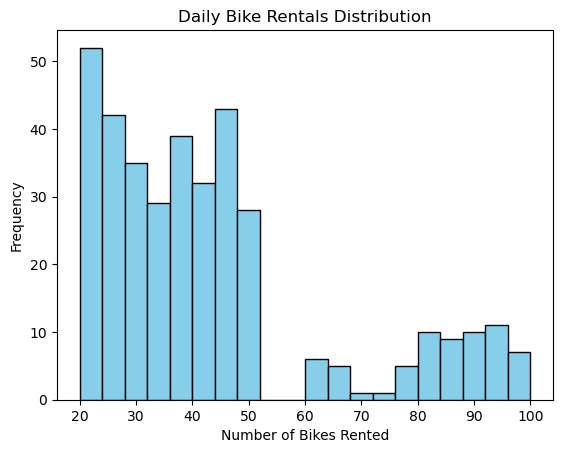

In [10]:
# Visualize the distribution
plt.hist(bike_rentals, bins=20, color='skyblue', edgecolor='black')
plt.title("Daily Bike Rentals Distribution")
plt.xlabel("Number of Bikes Rented")
plt.ylabel("Frequency")
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assume bike_rentals data from previous example
# bike_rentals already contains 365 days of data

# Parameters for sampling
sample_size = 30      # Number of days per sample
num_samples = 1000    # Number of samples to draw

# Store sample means
sample_means = []

# Draw random samples and calculate means
for _ in range(num_samples):
    sample = np.random.choice(bike_rentals, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Convert to numpy array
sample_means = np.array(sample_means)

# Compare original data mean vs sample means mean
print("Original Data Mean:", np.mean(bike_rentals))
print("Mean of Sample Means:", np.mean(sample_means))
print("Standard Deviation of Sample Means:", np.std(sample_means))

Original Data Mean: 43.14520547945205
Mean of Sample Means: 43.22383333333334
Standard Deviation of Sample Means: 3.830241619155521


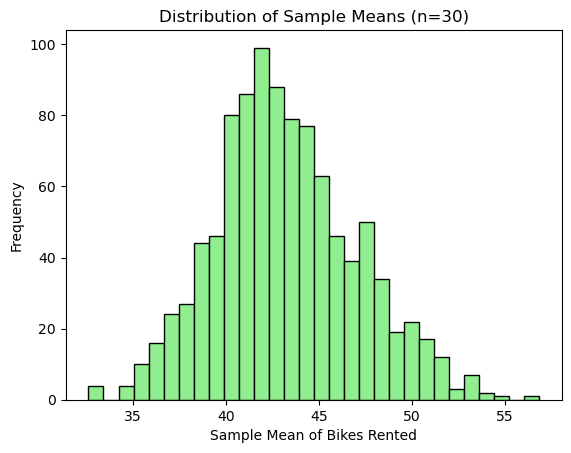

In [12]:
# Plot the distribution of sample means
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean of Bikes Rented")
plt.ylabel("Frequency")
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume bike_rentals data from previous example
# bike_rentals already contains 365 days of data

# Parameters for sampling
sample_size = 50      # Number of days per sample
num_samples = 1000    # Number of samples to draw

# Store sample means
sample_means = []

# Draw random samples and calculate means
for _ in range(num_samples):
    sample = np.random.choice(bike_rentals, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Convert to numpy array
sample_means = np.array(sample_means)

# Compare original data mean vs sample means mean
print("Original Data Mean:", np.mean(bike_rentals))
print("Mean of Sample Means:", np.mean(sample_means))
print("Standard Deviation of Sample Means:", np.std(sample_means))

Original Data Mean: 43.14520547945205
Mean of Sample Means: 43.06606
Standard Deviation of Sample Means: 2.9496096820426936


In [ ]:
# Plot the distribution of sample means
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean of Bikes Rented")
plt.ylabel("Frequency")
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assume bike_rentals data from previous example
# bike_rentals already contains 365 days of data

# Parameters for sampling
sample_size = 80      # Number of days per sample
num_samples = 1000    # Number of samples to draw

# Store sample means
sample_means = []

# Draw random samples and calculate means
for _ in range(num_samples):
    sample = np.random.choice(bike_rentals, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Convert to numpy array
sample_means = np.array(sample_means)

# Compare original data mean vs sample means mean
print("Original Data Mean:", np.mean(bike_rentals))
print("Mean of Sample Means:", np.mean(sample_means))
print("Standard Deviation of Sample Means:", np.std(sample_means))

Original Data Mean: 43.14520547945205
Mean of Sample Means: 43.0388125
Standard Deviation of Sample Means: 2.328547628586057


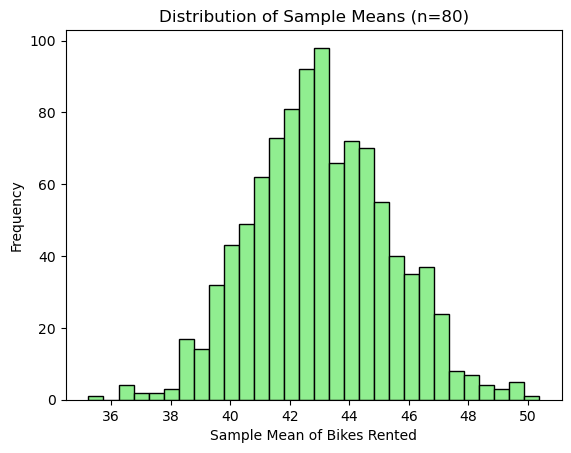

In [15]:
# Plot the distribution of sample means
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean of Bikes Rented")
plt.ylabel("Frequency")
plt.show()